## Observations and Insights 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(
    left=mouse_metadata,
    right=study_results,
    how='outer',
    on = "Mouse ID")

In [67]:
# Checking the number of mice in the DataFrame.
num_of_mice = len(data['Mouse ID'].unique())

In [68]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data[['Mouse ID','Timepoint']].value_counts().head(5)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
dtype: int64

In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
indexed_data = data.set_index('Mouse ID')
indexed_data.loc['g989', :]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = indexed_data.drop(index='g989')
clean_data = clean_data.reset_index()
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [71]:
# Checking the number of mice in the clean DataFrame.
num_of_mice = len(clean_data['Mouse ID'].unique())
num_of_mice

248

## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_mean = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_volume_median = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_volunme_var = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_volume_std = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_volume_sem = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# This method is the most straightforward, creating multiple series and putting them all together at the end.
clean_data_stats_1 = pd.DataFrame({
    'Tumor Volume Mean': tumor_volume_mean,
    'Tumor Volume Median': tumor_volume_median,
    'Tumor Volume Variance': tumor_volunme_var,
    'Tumor Volume Std Dev': tumor_volume_std,
    'Tumor Volume SEM': tumor_volume_sem
})
clean_data_stats_1

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
clean_data_stats_2 = clean_data.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
clean_data_stats_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

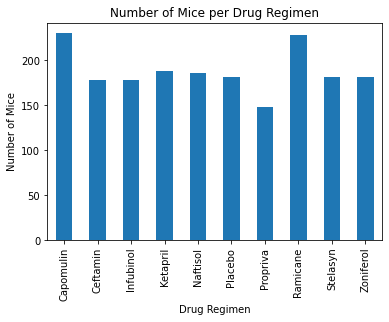

In [74]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_count_per_drug = clean_data.groupby('Drug Regimen').count()['Timepoint']

mice_count_per_drug.plot(kind='bar')
plt.title('Number of Mice per Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

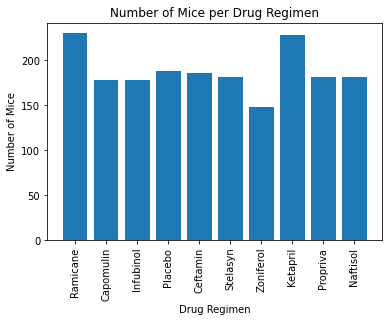

In [75]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drug_regimen = clean_data['Drug Regimen'].unique()
drug_regimen
mice_count_per_drug

plt.bar(
    x=drug_regimen,
    height=mice_count_per_drug
)
plt.xticks(rotation=90)
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

## Pie Plots

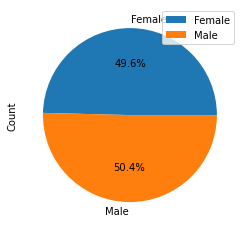

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_groupby = clean_data.groupby(['Mouse ID', 'Sex'])
mouse_gender_df = pd.DataFrame(mouse_gender_groupby.size()).groupby('Sex')

mouse_gender_count = pd.DataFrame(mouse_gender_df.count())
mouse_gender_count.columns = ['Count']
mouse_gender_count

mouse_gender_count.plot(kind='pie', y='Count', autopct='%1.1f%%')
plt.show()

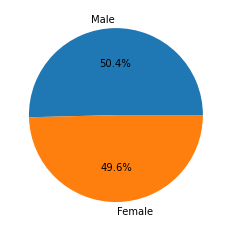

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_data['Sex'].unique()
values = [125, 123]

plt.pie(
    x=values,
    labels=gender,
    autopct='%1.1f%%'
)
plt.show()


## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin', :]
ramicane_df = clean_data.loc[clean_data['Drug Regimen'] == 'Ramicane', :]
infubinol_df = clean_data.loc[clean_data['Drug Regimen'] == 'Infubinol', :]
ceftamin_df = clean_data.loc[clean_data['Drug Regimen'] == 'Ceftamin', :]

# Capomulin
capomulin_volume_df = capomulin_df['Tumor Volume (mm3)']
cap_quartiles = capomulin_volume_df.quantile(q=[.25,.5,.75])
cap_lowerq = cap_quartiles[.25]
cap_upperq = cap_quartiles[.75]
cap_iqr = cap_upperq - cap_lowerq
cap_lower_bound = cap_lowerq - (1.5 * cap_iqr)
cap_upper_bound = cap_upperq + (1.5 * cap_iqr)
print('Capomulin:')
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

cap_lower_outliers = len(capomulin_df.loc[capomulin_df['Tumor Volume (mm3)'] < cap_lower_bound])
cap_upper_outliers = len(capomulin_df.loc[capomulin_df['Tumor Volume (mm3)'] > cap_upper_bound])
print(f"{cap_lower_outliers} lower outlier(s) and {cap_upper_outliers} upper outlier(s) found.")
print('\n')


# Ramicane
ramicane_volume_df = ramicane_df['Tumor Volume (mm3)']
ram_quartiles = ramicane_volume_df.quantile(q=[.25,.5,.75])
ram_lowerq = ram_quartiles[.25]
ram_upperq = ram_quartiles[.75]
ram_iqr = ram_upperq - ram_lowerq
ram_lower_bound = ram_lowerq - (1.5 * ram_iqr)
ram_upper_bound = ram_upperq + (1.5 * ram_iqr)
print('Ramicane:')
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

ram_lower_outliers = len(ramicane_df.loc[ramicane_df['Tumor Volume (mm3)'] < ram_lower_bound])
ram_upper_outliers = len(ramicane_df.loc[ramicane_df['Tumor Volume (mm3)'] > ram_upper_bound])
print(f"{ram_lower_outliers} lower outlier(s) and {ram_upper_outliers} upper outlier(s) found.")
print('\n')


# Infubinol
infubinol_volume_df = infubinol_df['Tumor Volume (mm3)']
inf_quartiles = infubinol_volume_df.quantile(q=[.25,.5,.75])
inf_lowerq = inf_quartiles[.25]
inf_upperq = inf_quartiles[.75]
inf_iqr = inf_upperq - inf_lowerq
inf_lower_bound = inf_lowerq - (1.5 * inf_iqr)
inf_upper_bound = inf_upperq + (1.5 * inf_iqr)
print('Infubinol:')
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

inf_lower_outliers = len(infubinol_df.loc[infubinol_df['Tumor Volume (mm3)'] < inf_lower_bound])
inf_upper_outliers = len(infubinol_df.loc[infubinol_df['Tumor Volume (mm3)'] > inf_upper_bound])
print(f"{inf_lower_outliers} lower outlier(s) and {inf_upper_outliers} upper outlier(s) found.")
print('\n')


# Ceftamin
ceftamin_volume_df = ceftamin_df['Tumor Volume (mm3)']
cef_quartiles = ceftamin_volume_df.quantile(q=[.25,.5,.75])
cef_lowerq = cef_quartiles[.25]
cef_upperq = cef_quartiles[.75]
cef_iqr = cef_upperq - cef_lowerq
cef_lower_bound = cef_lowerq - (1.5 * inf_iqr)
cef_upper_bound = cef_upperq + (1.5 * inf_iqr)
print('Ceftamin:')
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

cef_lower_outliers = len(ceftamin_df.loc[ceftamin_df['Tumor Volume (mm3)'] < cef_lower_bound])
cef_upper_outliers = len(ceftamin_df.loc[ceftamin_df['Tumor Volume (mm3)'] > cef_upper_bound])
print(f"{cef_lower_outliers} lower outlier(s) and {cef_upper_outliers} upper outlier(s) found.")
print('\n')


Capomulin:
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
2 lower outlier(s) and 0 upper outlier(s) found.


Ramicane:
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.
1 lower outlier(s) and 0 upper outlier(s) found.


Infubinol:
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
0 lower outlier(s) and 0 upper outlier(s) found.


Ceftamin:
Values below 32.20529111124999 could be outliers.
Values above 71.80457357125002 could be outliers.
0 lower outlier(s) and 0 upper outlier(s) found.




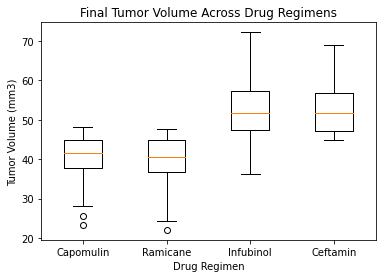

In [79]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot([capomulin_volume_df, ramicane_volume_df, infubinol_volume_df, ceftamin_volume_df])
ax1.set_title('Final Tumor Volume Across Drug Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

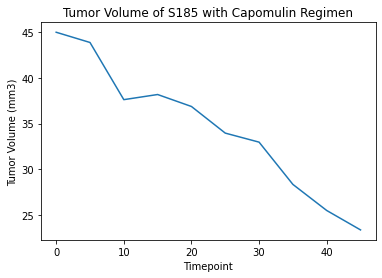

In [80]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df.head()
cap_mouse_ID = 's185'
cap_mouse_ID_df = capomulin_df.loc[capomulin_df['Mouse ID'] == cap_mouse_ID, :]
cap_mouse_ID_timepoint = cap_mouse_ID_df['Timepoint']
cap_mouse_ID_tumor_volume = cap_mouse_ID_df['Tumor Volume (mm3)']

plt.plot(
    cap_mouse_ID_timepoint,
    cap_mouse_ID_tumor_volume
)
plt.title('Tumor Volume of S185 with Capomulin Regimen')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

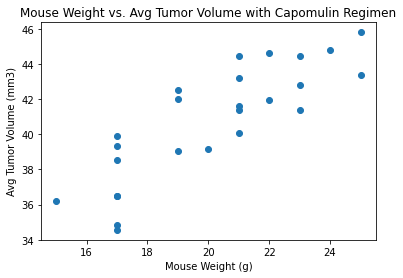

In [81]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_weight_vs_tumor_volume = capomulin_df.groupby('Mouse ID').mean()
cap_weight = cap_weight_vs_tumor_volume['Weight (g)']
cap_tumor_volume = cap_weight_vs_tumor_volume['Tumor Volume (mm3)']

plt.scatter(
    x=cap_weight,
    y=cap_tumor_volume
)
plt.title('Mouse Weight vs. Avg Tumor Volume with Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight (g) and average tumor volume (mm3) is 0.84



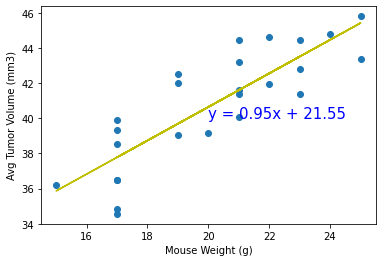

In [99]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_weight,cap_tumor_volume)
print(f"The correlation between mouse weight (g) and average tumor volume (mm3) is {round(correlation[0],2)}" + '\n')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_weight, cap_tumor_volume)
regress_values = cap_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(cap_weight,cap_tumor_volume)
plt.plot(cap_weight,regress_values,"y-")
plt.annotate(line_eq,(20,40),fontsize=15,color="blue")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()